In [130]:
  !pip install koreanize-matplotlib

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [132]:
df = pd.read_excel('대구 데이터프레임(3차 수정).xlsx')
df.head()

,행정구역,노인 인구 수,고독사 수,독거노인 수,병원 수,약국 수,경로당 수,공공체육시설 수,마트 수,음식점 수,버스정류장 수,지하철 역 수,안전지수,공원 수
0,중구,17113,21.3,3467,467,151,48,2,35,2989,118,10,1.3,17
1,동구,76756,48.7,14661,494,184,222,23,23,4497,583,13,1.3,91
2,서구,42936,28.3,8822,269,109,79,13,15,2375,189,4,0.8,28
3,남구,36561,21.0,8061,258,109,67,6,18,2176,164,9,1.2,24
4,북구,73675,30.7,12761,591,205,283,38,46,4957,592,14,2.0,130


In [133]:
dfStandard = df.drop(columns='행정구역')
dfStandard.head()

,노인 인구 수,고독사 수,독거노인 수,병원 수,약국 수,경로당 수,공공체육시설 수,마트 수,음식점 수,버스정류장 수,지하철 역 수,안전지수,공원 수
0,17113,21.3,3467,467,151,48,2,35,2989,118,10,1.3,17
1,76756,48.7,14661,494,184,222,23,23,4497,583,13,1.3,91
2,42936,28.3,8822,269,109,79,13,15,2375,189,4,0.8,28
3,36561,21.0,8061,258,109,67,6,18,2176,164,9,1.2,24
4,73675,30.7,12761,591,205,283,38,46,4957,592,14,2.0,130


In [134]:
scaler = StandardScaler()
df_standardized_values = scaler.fit_transform(dfStandard)
df_standardized = pd.DataFrame(df_standardized_values, columns=dfStandard.columns)

In [135]:
df_standardized['행정구역'] = df['행정구역']
print(df_standardized)

    노인 인구 수     고독사 수    독거노인 수      병원 수      약국 수     경로당 수  공공체육시설 수  \
0 -1.623076 -0.576606 -1.612695 -0.185920 -0.290513 -1.398634 -1.392024   
1  0.803703  1.872851  0.979054 -0.067806  0.261253  0.269660 -0.180314   
2 -0.572379  0.049168 -0.372850 -1.052091 -0.992762 -1.101409 -0.757319   
3 -0.831768 -0.603425 -0.549045 -1.100211 -0.992762 -1.216464 -1.161222   
4  0.678342  0.263719  0.539147  0.356530  0.612377  0.854521  0.685193   
5  0.732539  0.558727  0.498629  1.502674  0.846460  0.528533  0.338990   
6  1.495650  0.263719  1.548619  1.520173  1.799512  0.768230  0.742894   
7 -0.683011 -1.828153 -1.030859 -0.973348 -1.243565  1.295564  1.723802   

       마트 수     음식점 수   버스정류장 수   지하철 역 수      안전지수      공원 수 행정구역  
0  0.735093 -0.652242 -1.389848 -0.218218 -0.642999 -1.256847   중구  
1 -0.273035  0.457112  0.776149  0.436436 -0.642999  0.088638   동구  
2 -0.945120 -1.103929 -1.059126 -1.527525 -1.399469 -1.056843   서구  
3 -0.693088 -1.250322 -1.175578 -0.436436 -0.794

In [136]:
df_standardized.to_excel('S - 정규화.xlsx', index=False)

In [117]:
dfAverage = pd.read_excel('정규화 평균 지수.xlsx')
dfAverage.drop(columns='행정구역', inplace=True)
dfAverage.head()

,수요 지수,인프라 지수,접근성 지수,환경 지수
0,-1.270792,-0.530707,-0.804033,-0.949923
1,1.218536,0.077812,0.606292,-0.277180
2,-0.298687,-0.992105,-1.293326,-1.228156
3,-0.661412,-1.069012,-0.806007,-0.961932
4,0.493736,0.827223,0.736363,0.606902


**KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

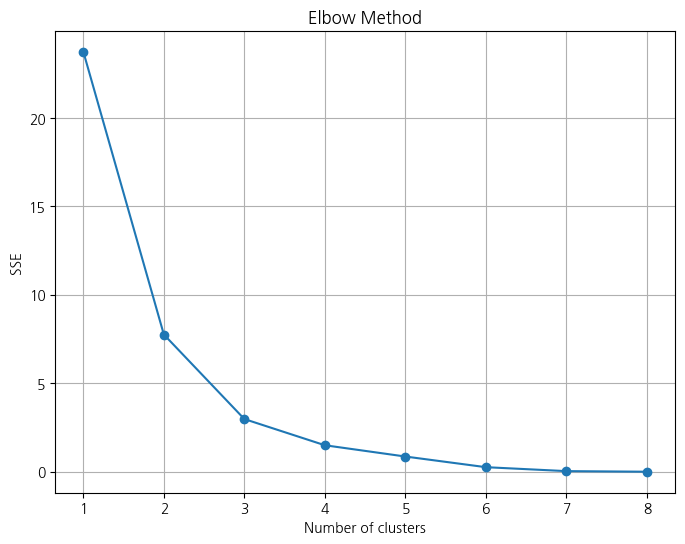

In [118]:
sse = []

K_range = range(1, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfAverage)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

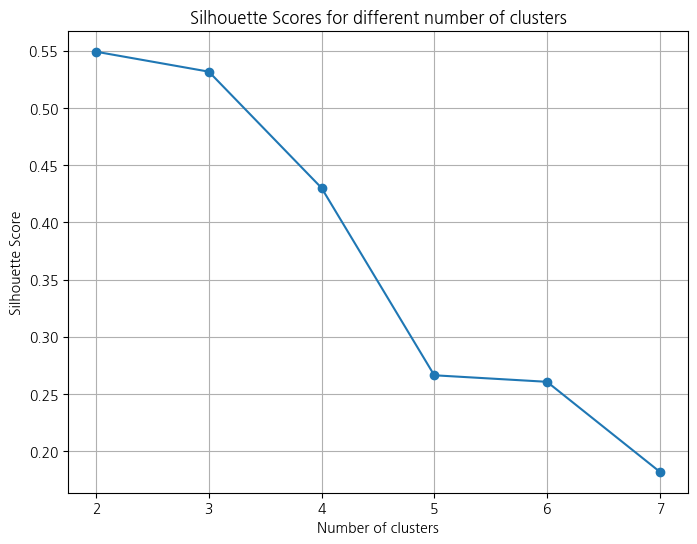

In [119]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# 클러스터 범위 설정
K_range = range(2, 8)  # 2에서 8 클러스터 시도

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dfAverage)
    score = silhouette_score(dfAverage, cluster_labels)
    silhouette_scores.append(score)

# Silhouette Score Plot 생성
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid()
plt.show()

In [120]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


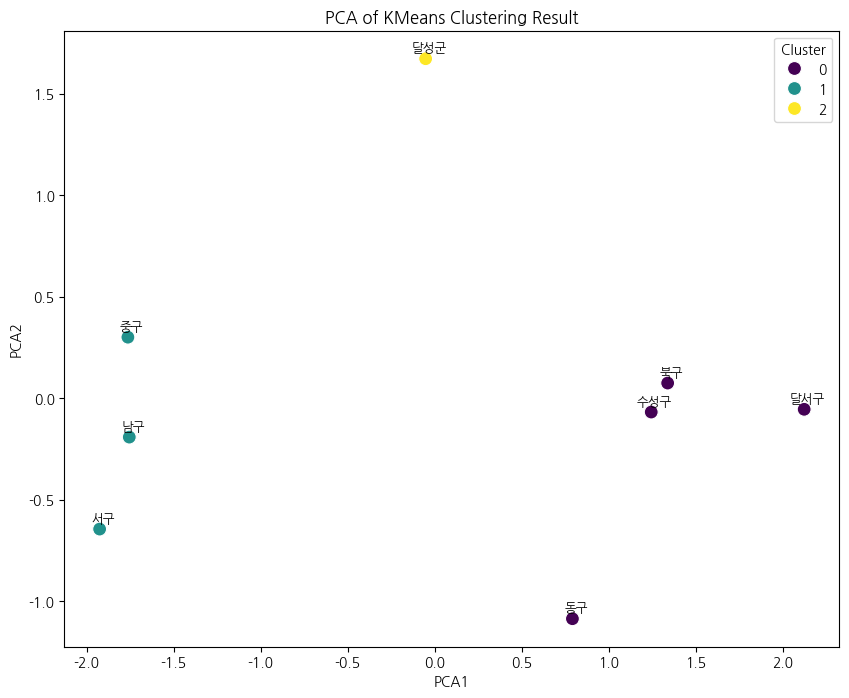

In [121]:
# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = pca_result[:, 0]
dfAverage['PCA2'] = pca_result[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=dfAverage, palette='viridis', s=100)

for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i] + 0.02, txt, fontsize=9, ha='center', va='bottom')

plt.title('PCA of KMeans Clustering Result')
plt.legend(title='Cluster')
plt.show()

In [122]:
dfAverage.to_excel('S - KMeans클러스터링 결과.xlsx', index=False)

**DBSCAN**

In [123]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(dfAverage)
dfAverage['cluster'] = db.labels_
print(dfAverage)

      수요 지수    인프라 지수    접근성 지수     환경 지수  cluster      PCA1      PCA2
0 -1.270792 -0.530707 -0.804033 -0.949923       -1 -1.763003  0.300459
1  1.218536  0.077812  0.606292 -0.277180       -1  0.791052 -1.087055
2 -0.298687 -0.992105 -1.293326 -1.228156       -1 -1.925418 -0.645248
3 -0.661412 -1.069012 -0.806007 -0.961932       -1 -1.755020 -0.191983
4  0.493736  0.827223  0.736363  0.606902       -1  1.338210  0.074398
5  0.596631  0.605950  0.760560  0.521827       -1  1.243869 -0.068480
6  1.102662  1.287525  0.780259  1.079640       -1  2.122585 -0.054939
7 -1.180674 -0.206687  0.019891  1.208822       -1 -0.052274  1.672847


**계층적 군집화**

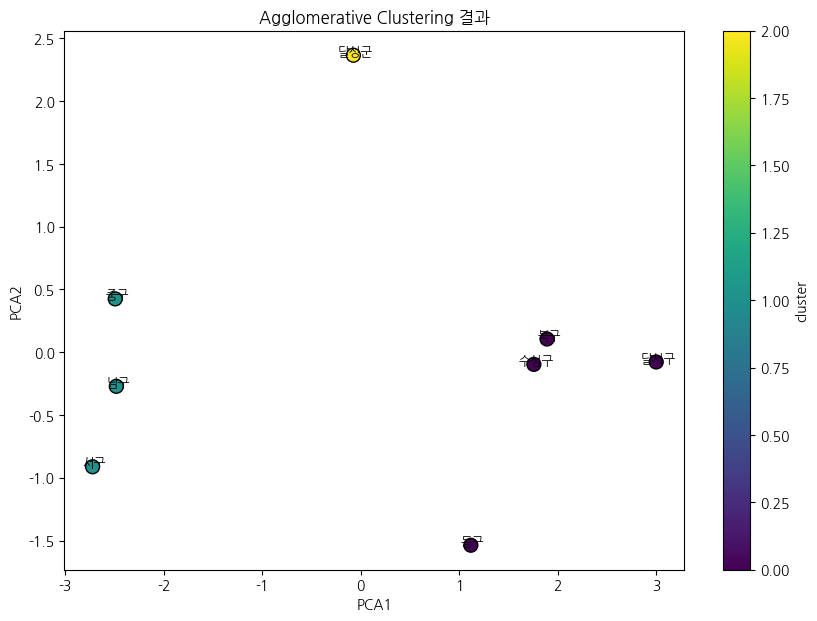

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
clusters = agg.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = principal_components[:, 0]
dfAverage['PCA2'] = principal_components[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 7))
plt.scatter(dfAverage['PCA1'], dfAverage['PCA2'], c=dfAverage['cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i], txt, fontsize=9, ha='center')


plt.title('Agglomerative Clustering 결과')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='cluster')
plt.show()


In [125]:
dfAverage.to_excel('S - 계층적 군집화 결과.xlsx', index=False)

**K**-**Medoids**

In [24]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00


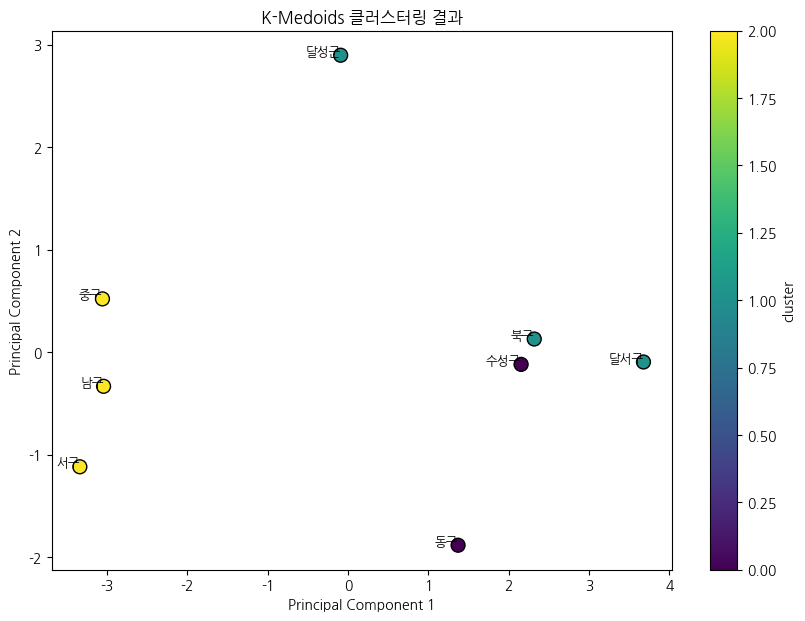

Cluster 0:
[1, 5]
Cluster 1:
[4, 6, 7]
Cluster 2:
[0, 2, 3]


In [126]:
# KMedoids 클러스터링
kmedoids = KMedoids(n_clusters=3, random_state=42)
clusters = kmedoids.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))

# 2D 시각화
plt.figure(figsize=(10, 7))
sc = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                 c=dfAverage['cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(principal_components[i, 0], principal_components[i, 1], txt, fontsize=9, ha='right')

plt.title('K-Medoids 클러스터링 결과')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(sc, label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(3):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())


In [127]:
dfAverage.to_excel('S - K-Medoids클러스터링 결과.xlsx', index=False)